# Домашняя работа №2

In [163]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import t

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

Генеральная совокупность - это все существующие значения. Статистическая выборка - случайно выбранное подмножество генеральной совокупности.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

Нельзя ответить однозначно. Все сильно зависит от размера генеральной совокупности, а так же от способа формирования случайной выборки.
Оценка репрезентативности выборки осуществляется в тесной связи с предметом исследования. 

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

1. Длина волос футболистов в плей-офф ЧМ-2018.
2. Длина волос футболистов фрунцузов.
3. Длина волос футболистов французов выходивших в финал ЧМ с 1998 года.

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

1. Берем по n детей из каждого месяца, каждого года, начиная с момента исследования.
2. За каждый год берем по n результатов из каждого родильного дома Волгограда.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


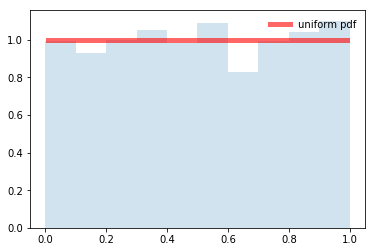

In [3]:
#uniform distribution
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = stats.uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [4]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = np.median(sample)
mean = sample.mean()

#your code here
overshoot = np.array([10, -11, 132, 44])
sample_with_overshoot = np.concatenate((sample, overshoot))
new_med = np.median(sample_with_overshoot)
new_mean = sample_with_overshoot.mean()
print(f'Median {med}', f'Overshoot median {new_med}')
print(f'Mean {mean}', f'Oveshoot mean {new_mean}')
# медиана - робастная (устойчивая), среднее - нет


Median 3.6700688513685678 Overshoot median 3.7288857062603222
Mean 3.9390977336859576 Oveshoot mean 6.834436080326978


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [72]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = np.array([x + C for x in sample]).mean()
mean_mult_c = np.array([x * C for x in sample]).mean()
print(f'Mean {mean}', f'Mean with const {mean_with_c}', f'Mean of multiplied by const sample {mean_mult_c}')


Mean 1.99 Mean with const 2.49 Mean of multiplied by const sample 0.995


Таким образом, добавление константы к выборке эквивалентно добавлению этой константы к среднему, а умножение на константу - эквивалентно умножению среднего на эту константу.

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [73]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = np.array([10, -10, 15, 25, 30, 11])
sample_with_overshoot = np.concatenate((sample, overshoot))
new_var = sample_with_overshoot.var()
print(f'Variance {var}, variance with overshoot {new_var}')

# Таким образом, при добавлении выбросов, размах случайной величины увеличивается, что ведет и росту дисперсии

Variance 1.2581670796253221, variance with overshoot 25.31650402213482


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [38]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)

#your code here
percentile_range = np.percentile(sample, 75) - np.percentile(sample, 25)

var = sample.var()
mean = sample.mean()
statistics_range = (mean + var) - (mean - var)
print(f'Percentile range {percentile_range}, statistics range {statistics_range}')

# check yourself
# estimate number of values, which are in quantile interval and in statistics interval
percentile_vals = []
statistics_vals = []
[ statistics_vals.append(val) for val in sample if (mean - var) <= val <= (mean + var) ]
[ percentile_vals.append(val) for val in sample if np.percentile(sample, 25) <= val <= np.percentile(sample, 75) ]

print(f'Sample elements in percentile interval {len(percentile_vals)}, sample elems in statistics interval {len(statistics_vals)}')


Percentile range 1.376358154909921, statistics range 2.0756014409515275
Sample elements in percentile interval 500, sample elems in statistics interval 702


Таким образом, интерквантильный размах $( X_{0.75} − X_{0.25} )$ уже, чем $(\bar{X} - s, \bar{X} + s)$

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [97]:
# Основные статистики - это основные статистические показатели, характеризующие выборку
# в данном случае выборочное среднее, выборочная дисперсия
beta_rv = stats.beta(1,3)

#your code here
vals = beta_rv.rvs(1000)
mean = vals.mean()
var = vals.var()
print(f'Mean val: {mean}, Variance: {var}')

Mean val: 0.24528100867268635, Variance: 0.0366859206736384


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

Оценка матожидания - выборочное среднее

Оценка медианы - средний элемент выборки, отсортированной в порядке возрастания (если кол-во элементов нечетное), либо среднее арифметическое двух соседних средних элементов, если кол-ыо элементов в выборке четное

Оценка дисперсии - выборочная дисперсия

In [40]:
gamma_rv = stats.gamma(2,2)

#your code here
sample = gamma_rv.rvs(1000)
mean = sample.mean()
var = sample.var()

sorted_sample = sorted(sample)
med = (sorted_sample[49] + sorted_sample[50])/2

print(f'Mean val: {mean}, Variance: {var}, Median: {med}')

Mean val: 3.962715176852902, Variance: 2.0367598853060067, Median: 2.3353088618992013


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Means mean: 4.997636407864696, means variance 0.07944410455865383, std err 0.011235093011743448


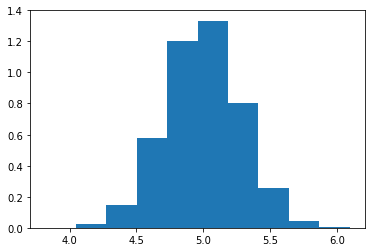

In [119]:
#your code here
norm_rv = stats.norm(5, 2)

means = []
for i in range(10000):
    sample = norm_rv.rvs(50)
    means.append(sample.mean())

means = np.array(means)
means_mean = means.mean()
means_var = means.var() 
std_err = means_var ** .5 / 50 ** .5 # т.к. это means_var = s^2, тогда SE = means_var ^ 0.5 / n ^ 0.5
print(f'Means mean: {means_mean}, means variance {means_var}, std err {std_err}')

plt.hist(means, density=True)
plt.show()

$\bar{X}$ будет иметь распределение $\mathcal{N}(M,SE)$, где $M \approx  5$ (матожидание генеральной совокупности), SE - стандартная ошибка средних, $SE \approx 0.04 $.  

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

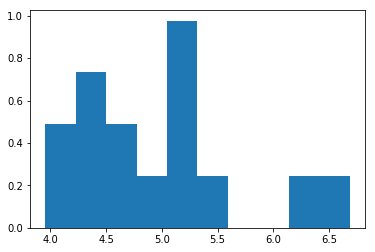

In [167]:
# Для того, чтобы ЦПТ не выполнялось, наши выборки должны быть не однородными,
# т.е. случайные величины не были распределены одинаково
norm_1 = stats.norm(5, 2)
norm_2 = stats.norm(2, 1)

means = []
for i in range(15):
    sample = norm_1.rvs(10)
    means.append(sample.mean())

plt.hist(means, density=True)
plt.show()

# Как мы видим в результате, распределение средних совсем не похоже на нормальное распределение

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [106]:
expon_rv = stats.expon(3)

sample = expon_rv.rvs(100)
mean = sample.mean()
var = sample.var() ** .5

new_rv = []
[ new_rv.append((val - mean)/var) for val in sample ]

new_rv = np.array(new_rv)
new_mean = round(new_rv.mean(), 3)
new_var = new_rv.var() ** .5

print(f'New mean: {new_mean}, new var: {new_var}')

New mean: 0.0, new var: 1.0


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [160]:
from scipy.stats import chi2

df = 10
print(f'chi2 90% interval: (0, {chi2.ppf(0.9, df)})')

chi2 90% interval: (0, 15.987179172105263)


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [157]:
df = 15

print(f't 90% interval: ({t.ppf(0.05, df)}, {t.ppf(0.95, df)})')
print(f't 95% interval: ({t.ppf(0.025, df)}, {t.ppf(0.975, df)})')
#95% интервал - шире

# проверим себя
t1 = t(df)
sample = t1.rvs(1000)
vals = []
[vals.append(val) for val in sample if t.ppf(0.05, df) <= val <= t.ppf(0.95, df)]
print(f'Percent of values in 90% intereval: {round(len(vals)/1000 * 100)}%')

t 90% interval: (-1.7530503556925552, 1.7530503556925547)
t 95% interval: (-2.131449545559323, 2.131449545559323)
Percent of values in 90% intereval: 90%


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [192]:
norm_rv = stats.norm(0, 2)

sample_smaller = norm_rv.rvs(5000)
sample_bigger = norm_rv.rvs(10000)

res = np.percentile(sample_smaller, 5)
res2 = np.percentile(sample_smaller, 95)
print(f'Interval 90% for smaller sample: ({res}, {res2})')

res = np.percentile(sample_bigger, 5)
res2 = np.percentile(sample_bigger, 95)
print(f'Interval 90% for bigger sample: ({res}, {res2})')
print('Bigger sample interval is wider and more accurate!')


Interval 90% for smaller sample: (-3.1550218760694446, 3.2628344866129306)
Interval 90% for bigger sample: (-3.2658626915593203, 3.3186677448543924)
Bigger sample interval is wider and more accurate!


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

Мы получили ошибку второго рода, так как гипотеза неверно принята

#### Какие рассуждения относительно p-value верные?

- Если p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется 0,003.

*Нет, неверно, т.к. это вероятность отклонить нулевую гипотезу, когда на самом деле она верна.*

- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.

*Неверное отверждение, мы лишь можем сказать, что не можем отвергуть данную гипотезу.*

- Чем меньше p уровень значимости, тем хуже гипотеза.

*не совсем верно, уменьшение p-value ведется к увеличению вероятности возникновения ошибки второго рода*

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

Если, рисковано отклонять, то 0.01
В общем случае скорее нет, так как он слишком общий

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

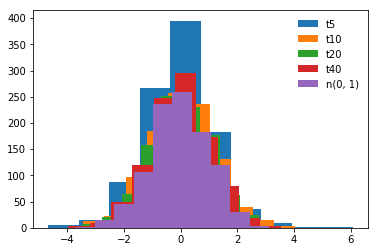

In [6]:
t5 = t(df=5).rvs(1000)
t10 = t(10).rvs(1000)
t20 = t(20).rvs(1000)
t40 = t(40).rvs(1000)
norm = stats.norm(0, 1).rvs(1000)

fig, ax = plt.subplots(1, 1)
    
ax.hist(t5, histtype='stepfilled', label='t5')
ax.hist(t10, histtype='stepfilled', label='t10')
ax.hist(t20, histtype='stepfilled', label='t20')
ax.hist(t40, histtype='stepfilled', label='t40')
ax.hist(norm, histtype='stepfilled', label='n(0, 1)')
ax.legend(loc='best', frameon=False)
plt.show()

# Отличие в том, что чем больше степеней свободы
# тем ближе мы к нормальному распределению с параметрами (0, 1) и тем кучнее распределены случайные значения

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

Corr matrix:
 [[ 1. -1.]
 [-1.  1.]]


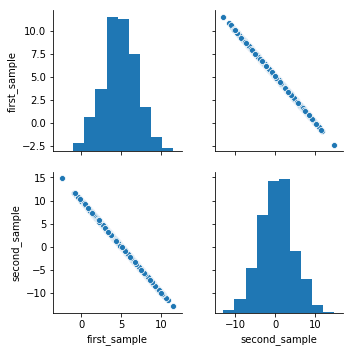

In [24]:
# реализуем линейную зависимость между выборками с отриц. коэфф. 
def some_foo(var):
    return var * (-2) + 10

norm = stats.norm(5, 2)

sample1 = norm.rvs(1000)
sample2 = []
[sample2.append(some_foo(val)) for val in sample1]

df1 = pd.DataFrame()
df1['first_sample'] = pd.Series(sample1)
df1['second_sample'] = pd.Series(sample2)

print(f"Corr matrix:\n {np.corrcoef(sample1, np.array(sample2))}")

sns.pairplot(df1)

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

Corr matrix:
 [[1. 0.]
 [0. 1.]]


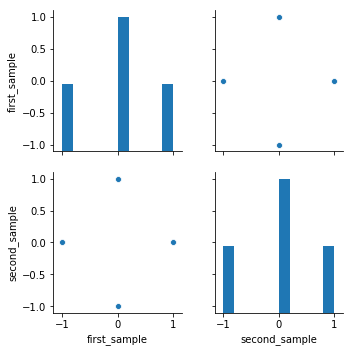

In [118]:

sample1 = stats.uniform(0.0, 1.0).rvs(100) * -1 
sample2 = sample1 ** 2

sample1 = np.array([1, 0, -1, 0]);
sample2 = np.array([0, 1, 0, -1]);  

print(f"Corr matrix:\n {np.corrcoef(sample1, sample2)}")

df1 = pd.DataFrame()
df1['first_sample'] = pd.Series(sample1)
df1['second_sample'] = pd.Series(sample2)

sns.pairplot(df1)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [155]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))


#your code here
def estimate_sample_rank(sample):
    '''
    Estimate total rank of one dimensional sample and rank each elem
    '''
    sample = sorted(sample)
    sample_dict = {}
    for idx, val in enumerate(sample):
        idx = idx + 1
        sample_dict.setdefault(val, {'rank': 0, 'vals': []})
        sample_dict[val]['vals'].append(idx)
    
    total_rank = 0
    for key in sample_dict.keys():
        sample_dict[key]['rank'] = sum(sample_dict[key]['vals']) / len(sample_dict[key]['vals'])
        total_rank = total_rank + sample_dict[key]['rank'] * len(sample_dict[key]['vals'])
        
    return {'ranked_sample': sample_dict, 'total_rank': total_rank}


print(f"Sample 1 total rank: {estimate_sample_rank(sample_1)['total_rank']}")
print(f"Sample 1 total rank: {estimate_sample_rank(sample_2)['total_rank']}")
print(f"Sample 1 total rank: {estimate_sample_rank(sample)['total_rank']}")

# To check your self
print(f'Total rank for sample with 100 unique vals {(1 + 100)*100/2}')
print(f'Total rank for sample with 200 unique vals {(1 + 200)*200/2}')

Sample 1 total rank: 5050.0
Sample 1 total rank: 5050.0
Sample 1 total rank: 20100.0
Total rank for sample with 100 unique vals 5050.0
Total rank for sample with 200 unique vals 20100.0
